<a href="https://colab.research.google.com/github/brianosmith/EXSY_fitting_notebook/blob/master/Saturation_curves_for_ligand_binding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Saturation curves for ligand binding

Goal is to produce a tool to calculate e.g. [L] required for a set fractional saturation at a known [M] or vice versa.

First simulate Y and plot it

$
Y = \frac{([M_{tot}] + [L_{tot}] + K_d) \pm \sqrt{([M_{tot}] + [L_{tot}] + K_d)^2 - 4[M_{tot}][L_{tot}]} }{ 2[M_{tot}]}
$

which is typically going to subtract the positive root of the square root from the sum.

In [2]:
# sqrt is in the math package and has to be imported
from math import sqrt

# some values to calculate with
M = 0.5
Kd = 0.15
L = 0.125

# careful placement of brackets required to get the correct evaluation order
# x**y to raise a value to a power

Y = ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)

print(Y)

0.1828640358836494


Lookup: [L], Y... [[0.1, 0.26794919243112253], [0.19, 0.4245370899470907], [0.28, 0.5314561435345977], [0.37, 0.6072823696195045], [0.45999999999999996, 0.6631225717283756], [0.5499999999999999, 0.7056382803105438], [0.64, 0.7389395359323281], [0.73, 0.7656528422124237], [0.82, 0.7875162337936142], [0.9099999999999999, 0.8057173989190858], [1.0, 0.8210916541997271]]


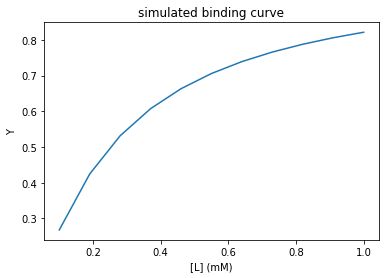

In [8]:
# for drawing the graph
%matplotlib inline
import matplotlib.pyplot as plt
# math function as above
from math import sqrt
# for creating the L values over which to sample the function. Would also be nice to capture the results in a more sophisticated array.
import numpy as np

M = 0.1
Kd = 0.2

Llow = 0.1
Lhigh = 1.0
nL = 11

Lval = np.linspace(Llow, Lhigh, nL)

Yval = []
Lookup = [] # could be np.array()
for L in Lval:
  Y = ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)
  Yval.append(Y)
  Lookup.append([L,Y])

# crude numerical output - should be formatted better
print("Lookup: [L], Y...", Lookup)

#plot the results
plt.title("simulated binding curve")
plt.xlabel('[L] (mM)')
plt.ylabel('Y')
plt.plot(Lval,Yval, label='Y')
#plt.legend()



can we make an equation solver to give us [L] using sympy?

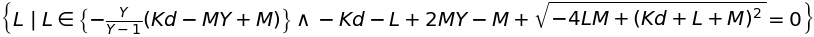

In [ ]:
from sympy import *
Y, M, L, Kd = symbols('Y M L Kd')
init_printing(use_unicode=True)

Eq(Y, ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M))

solveset(Eq(Y, ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)), L)


can we now solve for L for particular values of Y, M & Kd?

In [ ]:
#still using sympy and the symbols imported and defined above
fracSat = (((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)) - Y

newFracSat=fracSat.subs([(Y, 0.5), (M, 0.25), (Kd, 0.18)])

solveset(newFracSat, L)